# I] Import + user-defined variables

In [1]:
import pandas, numpy, math, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

In [2]:
# pip install matplotlib-venn

In [3]:
from matplotlib_venn import venn2

## functions & options


In [4]:
#define a function to split after the ".". The 1 is for how many word to have. if we have several dot. The [1] is what is after the dot, and [0] what is before
def split(L):
  return L.split(".",1)[0]

In [ ]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'

In [ ]:
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] Dataframe settings

## A) Isoform data

In [ ]:
%%time
# DL data GABARAP isoform expression
path = input_file_directory + "/xenabrower_brut_data/xena_GABARAP.tsv"
df_ori= pandas.read_csv(path, sep = "\t")
print(df_ori.shape)
df_ori.head(3)

In [6]:
# GABARAP : ENSG00000170296.9
# GABARAP(1) : ENST00000302386.9
# GABARAP(2) : ENST00000573928.1
# GABARAP(3) : ENST00000577035.5

In [7]:
# Column selection
df= df_ori[['sample',
            '_sample_type',
            '_primary_site',
            'ENSG00000170296.9',
            'ENST00000302386.9',
            'ENST00000573928.1', 
            'ENST00000577035.5']]

# We have Adrenal Gland and Adrenal gland. I need to put "G".
df = df.assign(_primary_site=df['_primary_site'].str.title()

# Column rename
df.rename(columns = {'sample' : 'sample',
    '_sample_type' : 'Sample_Type', 
                            '_primary_site' : 'Primary_Site', 
                            'ENST00000302386.9': 'GABARAP_1',
                            'ENST00000573928.1': 'GABARAP_2',
                            'ENST00000577035.5': 'GABARAP_3',
                            'ENSG00000170296.9': 'GABARAP'}, inplace = True)

# Calcul to have value from log2;  2**(GABARAP(1))-0.001
df["GABARAP(total)"] = pow(2,df['GABARAP'])-0.001
df["GABARAP(1)"] = pow(2,df['GABARAP_1'])-0.001
df["GABARAP(2)"] = pow(2,df['GABARAP_2'])-0.001
df["GABARAP(3)"] = pow(2,df['GABARAP_3'])-0.001

# Calcul to have log2+1 from value; 
df["log2_+1_GABARAP(total)"] = numpy.log2(df['GABARAP(total)']+1)
df["log2_+1_GABARAP(1)"] = numpy.log2(df['GABARAP(1)']+1)
df["log2_+1_GABARAP(2)"] = numpy.log2(df['GABARAP(2)']+1)

# Calcul to see percentage of expression of the 3 isoforms of GABARAP
df['GABARAP_prot_tot'] = (df['GABARAP(1)'] + df['GABARAP(2)'] + df['GABARAP(3)'])
df['GABARAP_1%'] = (df['GABARAP(1)'] *100)/ df['GABARAP_prot_tot']
df['GABARAP_2%'] = (df['GABARAP(2)'] *100)/ df['GABARAP_prot_tot']
df['GABARAP_3%'] = (df['GABARAP(3)'] *100)/ df['GABARAP_prot_tot']

#Add columns, normalized on total
df["GABARAP(1)norm"] = df['GABARAP(1)']/df["GABARAP(total)"]
df["GABARAP(2)norm"] = df['GABARAP(2)']/df["GABARAP(total)"]
df.head()

<ipython-input-7-3bb4e19d8780>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['_primary_site'] = df['_primary_site'].str.title()
C:\Users\kja11\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-7-3bb4e19d8780>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

,sample,Sample_Type,Primary_Site,GABARAP,GABARAP_1,GABARAP_2,GABARAP_3,GABARAP(total),GABARAP(1),GABARAP(2),GABARAP(3),log2_+1_GABARAP(total),log2_+1_GABARAP(1),log2_+1_GABARAP(2),GABARAP_prot_tot,GABARAP_1%,GABARAP_2%,GABARAP_3%,GABARAP(1)norm,GABARAP(2)norm
0,TCGA-AJ-A2QM-01,Primary Tumor,Endometrium,11.99,7.026,10.130,11.10,4067.705861,130.326706,1120.555750,2194.991051,11.990354,7.037017,10.131286,3445.873507,3.782109,32.518772,63.699119,0.032039,0.275476
1,GTEX-OIZI-0005-SM-2XCED,Normal Tissue,Blood,11.27,7.823,9.316,10.40,2469.493431,226.441351,637.374609,1351.175101,11.270584,7.829351,9.318259,2214.991061,10.223127,28.775493,61.001379,0.091695,0.258099
2,GTEX-XAJ8-0006-SM-46MVM,Normal Tissue,Blood,11.24,6.587,9.797,10.40,2418.671971,96.134675,889.590998,1351.175101,11.240596,6.601914,9.798619,2336.900774,4.113768,38.067128,57.819105,0.039747,0.367801
3,GTEX-ZP4G-0006-SM-4WWE6,Normal Tissue,Blood,11.18,6.138,9.749,10.36,2320.145197,70.423231,860.480282,1314.227119,11.180621,6.158321,9.750674,2245.130632,3.136710,38.326513,58.536777,0.030353,0.370873
4,GTEX-WFG8-0006-SM-3GIKS,Normal Tissue,Blood,11.17,6.901,9.374,10.49,2304.118777,119.510033,663.520774,1438.150553,11.170625,6.913009,9.376170,2221.181360,5.380472,29.872427,64.747102,0.051868,0.287972


In [8]:
df['Sample_Type'].value_counts()

Primary Tumor                                        9185
Normal Tissue                                        7429
Solid Tissue Normal                                   738
Cell Line                                             433
Metastatic                                            393
Primary Solid Tumor                                   286
Primary Blood Derived Cancer - Peripheral Blood       239
Primary Blood Derived Cancer - Bone Marrow            237
Recurrent Blood Derived Cancer - Bone Marrow          104
Recurrent Tumor                                        45
Recurrent Solid Tumor                                  13
Post treatment Blood Cancer - Bone Marrow              12
Additional - New Primary                               11
Recurrent Blood Derived Cancer - Peripheral Blood       3
Post treatment Blood Cancer - Blood                     1
Additional Metastatic                                   1
Control Analyte                                         1
Name: Sample_T

In [9]:
#Creation of two tables, Normal tissue and Primary tumor.
df_GABARAP_Normal = df[df['Sample_Type'].str.match ('Normal Tissue')]
df_GABARAP_Primary = df[df['Sample_Type'].str.match ('Primary Tumor')]

print('normal_tissue' , len(df_GABARAP_Normal))
print('primary_tumors' , len(df_GABARAP_Primary))

normal_tissue 7429
primary_tumors 9185


In [10]:
# df with only Normal and Primary 
df_Norm_Prim = pandas.concat([df_GABARAP_Normal, df_GABARAP_Primary], axis=0)
df_Norm_Prim.reset_index(drop=True, inplace=True)

### High/Low expression per Median for Isoform expression

In [11]:
# What is the median for iso 1 and iso 2?
#High >50% and low <50%

In [12]:
Data = [[df_GABARAP_Normal, 'Normal'], [df_GABARAP_Primary, 'Primary']]
isoforms = [["GABARAP_1", "iso1"], ["GABARAP_2", "iso2"]]

df_LoHi = [] 

for df in Data:
  for isoform in isoforms:
    xMed = df[0][isoform[0]].median()

    low = df[0].loc[df[0][isoform[0]] < xMed]
    low['L/H'] = "Low_"+isoform[1]

    high = df[0].loc[df[0][isoform[0]] > xMed]
    high['L/H'] = "High_"+isoform[1]

  #merge low and high
  concat = pandas.concat([low, high], axis=0)
  col = concat.pop('L/H')
  concat.insert(3, 'L/H', col)
  df_LoHi.append(concat)

normal_LoHi = df_LoHi[0]
primary_LoHi = df_LoHi[1]

<ipython-input-12-985df6934358>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low['L/H'] = "Low_"+isoform[1]
<ipython-input-12-985df6934358>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high['L/H'] = "High_"+isoform[1]
<ipython-input-12-985df6934358>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

## B) Whole gene expression

In [13]:
%%time
path = input_file_directory + "protein_coding_list.txt"
protein_coding_list= pandas.read_csv(path, sep = "\t")
print(protein_coding_list.shape)
protein_coding_list.head()

(22796, 4)
Wall time: 42.9 ms


,ensembl_gene_id,hgnc_symbol,entrezgene_id,transcript_biotype
1,ENSG00000198888,MT-ND1,4535.0,protein_coding
2,ENSG00000198763,MT-ND2,4536.0,protein_coding
3,ENSG00000198804,MT-CO1,4512.0,protein_coding
4,ENSG00000198712,MT-CO2,4513.0,protein_coding
5,ENSG00000228253,MT-ATP8,4509.0,protein_coding


In [16]:
%%time
# DL data gene expression for Normal Tissue and Primary Tumors
path = output_file_directory + "/ATG7/dataframes_for_input/"
ensembl_normal_protcoding_expr = pandas.read_csv(path+"ensembl_normal_protcoding_expr.tsv", sep = "\t")
ensembl_primary_protcoding_expr = pandas.read_csv(path+"ensembl_primary_protcoding_expr.tsv", sep = "\t")

print(ensembl_normal_protcoding_expr.shape)
print(ensembl_primary_protcoding_expr.shape)

ensembl_primary_protcoding_expr.head()

(7429, 19537)
(9185, 19383)
Wall time: 3min 38s


,sample,ENSG00000198888,ENSG00000198763,ENSG00000198804,ENSG00000198712,ENSG00000228253,ENSG00000198899,ENSG00000198938,ENSG00000198840,ENSG00000212907,...,ENSG00000160678,ENSG00000160679,ENSG00000143553,ENSG00000214193,ENSG00000196182,ENSG00000181817,ENSG00000116885,ENSG00000116898,ENSG00000119535,ENSG00000142694
0,TCGA-02-0047-01,12.9202,13.1220,14.0136,13.5251,13.8439,13.7777,13.4037,12.8123,13.4187,...,6.4741,5.8017,6.4975,2.1509,5.2445,6.0507,3.8915,5.5389,4.2936,4.6685
1,TCGA-02-0055-01,10.3972,10.7774,12.3945,12.3893,11.7280,11.9408,12.2022,11.0142,11.0221,...,5.9969,5.6888,6.0633,1.9822,4.3299,6.4992,3.7582,6.7092,4.5964,5.5145


In [18]:
#see how many duplicates in genes
print('normal shape:', ensembl_normal_protcoding.shape)
print('number of duplicated genes:', ensembl_normal_protcoding.columns.duplicated().sum())
print()
print('primary shape is:', ensembl_primary_protcoding.shape)
print('number of duplicated genes:', ensembl_primary_protcoding.columns.duplicated().sum())

normal shape: (7429, 19537)
number of duplicated genes: 0

primary shape is: (9185, 19383)
number of duplicated genes: 0


In [20]:
#Preparation of the global dataframe with GABARAP
data = [[ensembl_normal_protcoding, df_GABARAP_Normal], [ensembl_primary_protcoding, df_GABARAP_Primary]]

df_final = []

for df in data:
    #Merge the two df to have GABARAP isoform expression + whole gene expression 
  df_merged = pandas.merge(df[1], df[0], on= 'sample')

  #delete the sample column and select column
  df_merged = df_merged.drop("sample", 1)
  df_merged = df_merged.drop(df_merged.columns[5:19], axis=1)
  
  #save in list
  df_final.append(df_merged)

normal_protcoding_GABARAP_expr = df_final[0]
primary_protcoding_GABARAP_expr = df_final[1]

print(normal_protcoding_GABARAP_expr.shape)
print(primary_protcoding_GABARAP_expr.shape)
normal_protcoding_GABARAP_expr.head()

(7429, 19541)
(9185, 19387)


,Sample_Type,Primary_Site,GABARAP,GABARAP_1,GABARAP_2,ENSG00000198888,ENSG00000198763,ENSG00000198804,ENSG00000198712,ENSG00000228253,...,ENSG00000160678,ENSG00000160679,ENSG00000143553,ENSG00000214193,ENSG00000196182,ENSG00000181817,ENSG00000116885,ENSG00000116898,ENSG00000119535,ENSG00000142694
0,Normal Tissue,Blood,11.27,7.823,9.316,11.4278,11.9220,12.4100,13.1565,12.9439,...,2.1313,5.8726,4.8314,1.0433,6.1056,6.3116,1.4494,5.0527,11.9031,1.8484
1,Normal Tissue,Blood,11.24,6.587,9.797,11.1244,10.6001,11.5536,12.0039,11.6778,...,-1.8314,5.2601,4.2442,0.6050,6.9870,6.0466,-0.5125,4.4894,12.6822,4.4700
2,Normal Tissue,Blood,11.18,6.138,9.749,10.9395,10.4427,11.5286,12.1191,11.9713,...,-0.0574,5.7581,5.2419,0.5568,6.2610,6.3896,-0.4921,4.8575,12.4269,5.0553
3,Normal Tissue,Blood,11.17,6.901,9.374,10.6507,10.4939,12.1795,11.8817,11.2718,...,0.3907,5.9556,5.6491,-0.8339,6.0381,5.9619,-2.6349,3.6804,11.9587,1.0222
4,Normal Tissue,Blood,11.08,6.793,9.684,11.3773,10.9368,11.5022,12.1524,12.4101,...,-0.0877,5.8043,3.8973,0.3573,7.6873,5.7399,-0.6193,3.5645,12.6580,2.5996


# III] GABARAP expression

##A) Distribution


findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


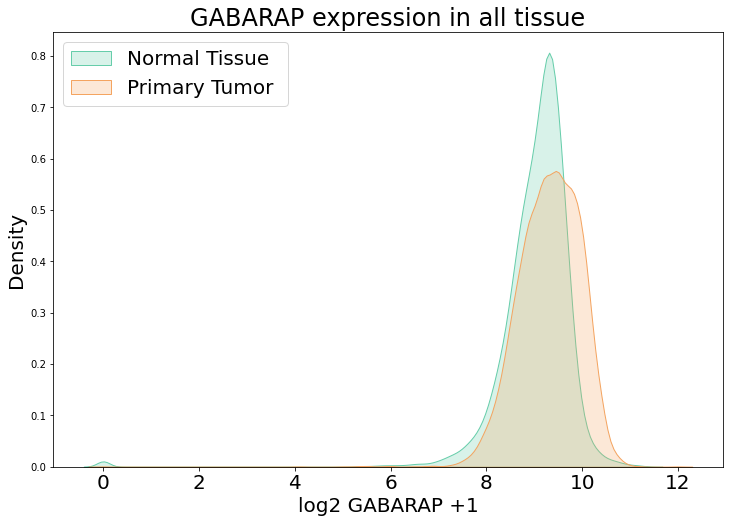

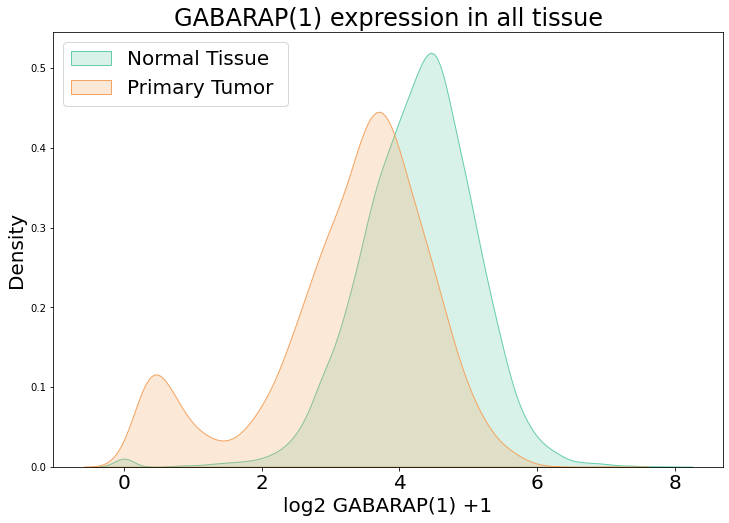

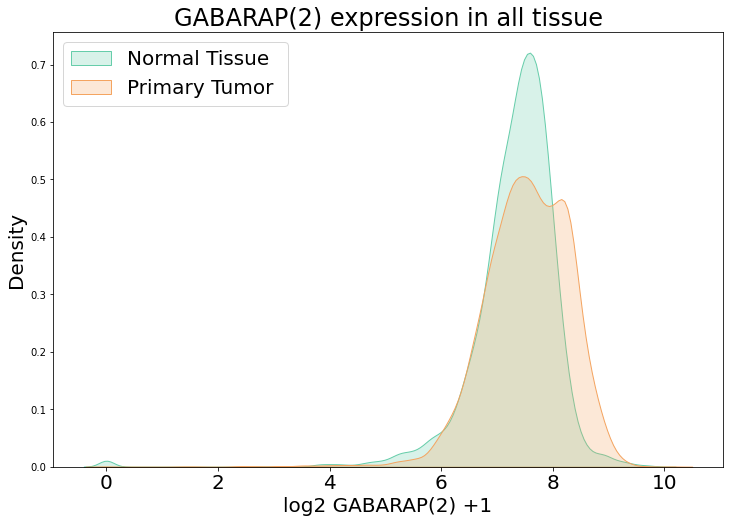

<Figure size 864x576 with 0 Axes>

In [21]:
# Distribution graph, for GABARAP, iso1 & iso2

all_dfs = [[df_GABARAP_Normal, 'in all tissue', df_GABARAP_Primary, 'all primary tumors']]

isoforms = [['log2_+1_GABARAP(total)', 'GABARAP'], ['log2_+1_GABARAP(1)', 'GABARAP(1)'], ['log2_+1_GABARAP(2)', 'GABARAP(2)']]


for df in all_dfs:
  for isoform in isoforms:
    xData = df[0][isoform[0]]
    x2Data = df[2][isoform[0]]

    seaborn.kdeplot(xData, color = 'mediumaquamarine', fill = True)
    seaborn.kdeplot(x2Data, color = 'sandybrown', fill = True)

    plt.xlabel('log2 '+ isoform[1]+ ' +1')
    plt.title(isoform[1]+ ' expression ' + df[1] )
    plt.legend(labels=["Normal Tissue","Primary Tumor "], loc='upper left')
    plt.show()
    plt.clf()

##B) Percentage do not express GABARAP isoforms

In [22]:
#Percentage of patients: 

all_dfs = [[df_GABARAP_Normal, 'all normal tissue'], [df_GABARAP_Primary, 'all primary tumor']]

isoforms = [['GABARAP(total)', 'GABARAP'], ['GABARAP(1)', 'GABARAP(1)'], ['GABARAP(2)', 'GABARAP(2)'], ['GABARAP(3)', 'GABARAP(3)']]

for df in all_dfs:
  print(df[1])
  for isoform in isoforms:
        
    QUOI = isoform[1]
    OU = df[1]
    all = (df[0][isoform[0]]).shape
    no_exp = (df[0][isoform[0]]<0.1).sum()
    perc_no_exp = (no_exp*100)/all
    perc_no_exp = float(perc_no_exp)

    # print("The percentage of patient who do not express", QUOI, OU, "is:", round(perc_no_exp,1),'%')
    print(round(perc_no_exp,1),'% of tumor do not express', QUOI)
  print()


all normal tissue
0.4 % of tumor do not express GABARAP
0.4 % of tumor do not express GABARAP(1)
0.4 % of tumor do not express GABARAP(2)
0.4 % of tumor do not express GABARAP(3)

all primary tumor
0.0 % of tumor do not express GABARAP
0.5 % of tumor do not express GABARAP(1)
0.0 % of tumor do not express GABARAP(2)
0.0 % of tumor do not express GABARAP(3)



## C) Expression figures

### 1) Value TPM

In [23]:
df_Norm_Prim.head()

,sample,Sample_Type,Primary_Site,GABARAP,GABARAP_1,GABARAP_2,GABARAP_3,GABARAP(total),GABARAP(1),GABARAP(2),GABARAP(3),log2_+1_GABARAP(total),log2_+1_GABARAP(1),log2_+1_GABARAP(2),GABARAP_prot_tot,GABARAP_1%,GABARAP_2%,GABARAP_3%,GABARAP(1)norm,GABARAP(2)norm
0,GTEX-OIZI-0005-SM-2XCED,Normal Tissue,Blood,11.27,7.823,9.316,10.40,2469.493431,226.441351,637.374609,1351.175101,11.270584,7.829351,9.318259,2214.991061,10.223127,28.775493,61.001379,0.091695,0.258099
1,GTEX-XAJ8-0006-SM-46MVM,Normal Tissue,Blood,11.24,6.587,9.797,10.40,2418.671971,96.134675,889.590998,1351.175101,11.240596,6.601914,9.798619,2336.900774,4.113768,38.067128,57.819105,0.039747,0.367801
2,GTEX-ZP4G-0006-SM-4WWE6,Normal Tissue,Blood,11.18,6.138,9.749,10.36,2320.145197,70.423231,860.480282,1314.227119,11.180621,6.158321,9.750674,2245.130632,3.136710,38.326513,58.536777,0.030353,0.370873
3,GTEX-WFG8-0006-SM-3GIKS,Normal Tissue,Blood,11.17,6.901,9.374,10.49,2304.118777,119.510033,663.520774,1438.150553,11.170625,6.913009,9.376170,2221.181360,5.380472,29.872427,64.747102,0.051868,0.287972
4,GTEX-QCQG-0006-SM-5SI8M,Normal Tissue,Blood,11.08,6.793,9.684,10.15,2164.771947,110.890118,822.572053,1136.198139,11.080666,6.805939,9.685751,2069.660310,5.357890,39.744302,54.897808,0.051225,0.379981


16614


<ipython-input-24-388e8c1dc51c>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_distrib['x'][: shape] = 'GABARAP'
C:\Users\kja11\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-24-388e8c1dc51c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_distrib['x'][shape: shape*2] = 'GABARAP(1)'
<ipython-input-24-388e8c1d

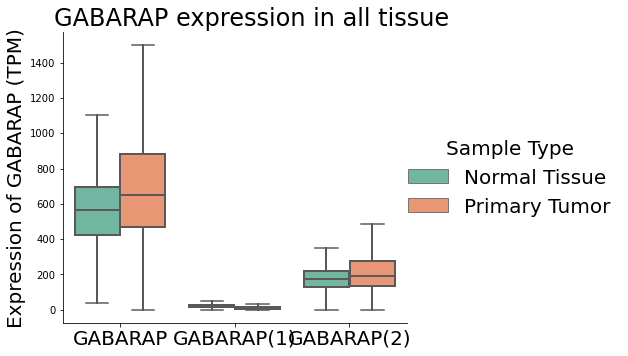

In [24]:
# Distribution: Data preparation + graph

data = [[df_Norm_Prim, 'all tissue']]

for df in data:
   
  shape = df[0].shape
  shape = shape[0]
  print(shape)

  #select the sample type column
  sample_type = {'sample_type':[df[0].iloc[:,1][i]
      for i in range(0, shape)]}

  #convert to df, and copy it 3 times
  sample_typedf = pandas.DataFrame(sample_type)
  sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf])
  sample_typedf.reset_index(drop=True, inplace=True)

  # Y for expression value 
  y = {'y':[df[0].iloc[:,j][i]
      for j in range(7,10)
        for i in range(0, shape)]}

  #create df with Y 
  data_distrib = pandas.DataFrame(y)

  # X for GABARAP/iso1/iso2
  data_distrib['x'] = ''
  data_distrib['x'][: shape] = 'GABARAP'
  data_distrib['x'][shape: shape*2] = 'GABARAP(1)'
  data_distrib['x'][shape*2:] = 'GABARAP(2)'

  # Will be used for Hue
  data_distrib['Sample Type'] = sample_typedf['sample_type']

  #graph
  seaborn.catplot(x="x", y="y", hue="Sample Type", aspect= 1.2, kind="box", palette = 'Set2', data = data_distrib, 
                  boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)
  
  plt.ylabel('Expression of GABARAP (TPM)')
  plt.xlabel('')
  plt.title('GABARAP expression in '+ df[1], x=.55)

16614


<ipython-input-25-2f866eb08be4>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_distrib['x'][: shape] = 'GABARAP(1)'
C:\Users\kja11\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-25-2f866eb08be4>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_distrib['x'][shape: shape*2] = 'GABARAP(2)'


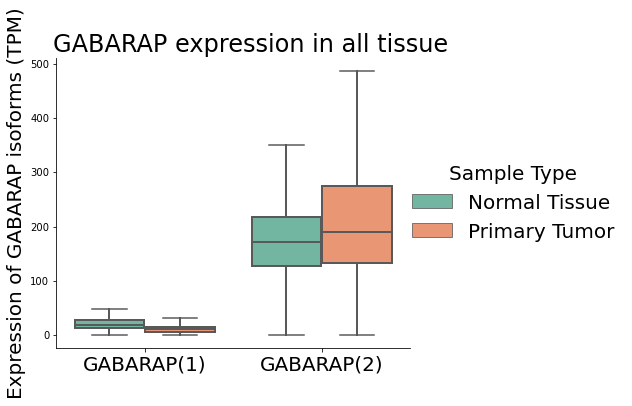

In [25]:
# Distribution: Data preparation + graph

data = [[df_Norm_Prim, 'all tissue']]

for df in data:
   
  shape = df[0].shape
  shape = shape[0]
  print(shape)

  #select the sample type column
  sample_type = {'sample_type':[df[0].iloc[:,1][i]
      for i in range(0, shape)]}

  #convert to df, and copy it 3 times
  sample_typedf = pandas.DataFrame(sample_type)
  sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf])
  sample_typedf.reset_index(drop=True, inplace=True)

  # Y for expression value 
  y = {'y':[df[0].iloc[:,j][i]
      for j in range(8,10)
        for i in range(0, shape)]}

  #create df with Y 
  data_distrib = pandas.DataFrame(y)

  # X for GABARAP/iso1/iso2
  data_distrib['x'] = ''
  data_distrib['x'][: shape] = 'GABARAP(1)'
  data_distrib['x'][shape: shape*2] = 'GABARAP(2)'

  # Will be used for Hue
  data_distrib['Sample Type'] = sample_typedf['sample_type']

  #graph
  seaborn.catplot(x="x", y="y", hue="Sample Type", aspect= 1.2, kind="box", palette = 'Set2', data = data_distrib, 
                  boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)
  
  plt.ylabel('Expression of GABARAP isoforms (TPM)')
  plt.xlabel('')
  plt.title('GABARAP expression in '+ df[1], x=.55)

In [26]:
#median brut file
print(df_Norm_Prim['GABARAP(total)'].mean())
print(df_Norm_Prim['GABARAP(1)'].mean())
print(df_Norm_Prim['GABARAP(2)'].mean())

640.7273617774167
16.118859738982103
194.8653756411718


In [27]:
#median after modification to be sure I selected the good ones
data_distribtest = data_distrib[data_distrib['x'] == 'GABARAP']
data_distribtest1 = data_distrib[data_distrib['x'] == 'GABARAP(1)']
data_distribtest2 = data_distrib[data_distrib['x'] == 'GABARAP(2)']
print(data_distribtest.mean())
print(data_distribtest1.mean())
print(data_distribtest2.mean())

y             NaN
x             NaN
Sample Type   NaN
dtype: float64
y    16.11886
dtype: float64
y    194.865376
dtype: float64


In [28]:
#Distribution: Stats for all 

all_dfs = [[df_GABARAP_Normal, 'all normal tissue', df_GABARAP_Primary, 'all primary tumors']]

isoforms = ['GABARAP(total)', 'GABARAP(1)', 'GABARAP(2)']

for df in all_dfs:
  for isoform in isoforms:

    n1 = "{:.3f}".format(numpy.median(df[0][isoform]))
    n2 = "{:.3f}".format(numpy.median(df[2][isoform]))

    # Mann-Whitney analysis 
    statistic, pvalue = scipy.stats.mannwhitneyu(df[0][isoform], df[2][isoform])
    Pvalue = "{:.3E}".format(pvalue)
    print("the pvalue between", df[1]+'('+n1+')', "and", df[3]+'('+n2+')', "for", isoform, 'is', Pvalue)
  print()


the pvalue between all normal tissue(567.312) and all primary tumors(651.218) for GABARAP(total) is 8.568E-145
the pvalue between all normal tissue(18.843) and all primary tumors(10.453) for GABARAP(1) is 0.000E+00
the pvalue between all normal tissue(172.087) and all primary tumors(189.098) for GABARAP(2) is 1.065E-70



### 2) Normalized

In [29]:
df_Norm_Prim.head()

,sample,Sample_Type,Primary_Site,GABARAP,GABARAP_1,GABARAP_2,GABARAP_3,GABARAP(total),GABARAP(1),GABARAP(2),GABARAP(3),log2_+1_GABARAP(total),log2_+1_GABARAP(1),log2_+1_GABARAP(2),GABARAP_prot_tot,GABARAP_1%,GABARAP_2%,GABARAP_3%,GABARAP(1)norm,GABARAP(2)norm
0,GTEX-OIZI-0005-SM-2XCED,Normal Tissue,Blood,11.27,7.823,9.316,10.40,2469.493431,226.441351,637.374609,1351.175101,11.270584,7.829351,9.318259,2214.991061,10.223127,28.775493,61.001379,0.091695,0.258099
1,GTEX-XAJ8-0006-SM-46MVM,Normal Tissue,Blood,11.24,6.587,9.797,10.40,2418.671971,96.134675,889.590998,1351.175101,11.240596,6.601914,9.798619,2336.900774,4.113768,38.067128,57.819105,0.039747,0.367801
2,GTEX-ZP4G-0006-SM-4WWE6,Normal Tissue,Blood,11.18,6.138,9.749,10.36,2320.145197,70.423231,860.480282,1314.227119,11.180621,6.158321,9.750674,2245.130632,3.136710,38.326513,58.536777,0.030353,0.370873
3,GTEX-WFG8-0006-SM-3GIKS,Normal Tissue,Blood,11.17,6.901,9.374,10.49,2304.118777,119.510033,663.520774,1438.150553,11.170625,6.913009,9.376170,2221.181360,5.380472,29.872427,64.747102,0.051868,0.287972
4,GTEX-QCQG-0006-SM-5SI8M,Normal Tissue,Blood,11.08,6.793,9.684,10.15,2164.771947,110.890118,822.572053,1136.198139,11.080666,6.805939,9.685751,2069.660310,5.357890,39.744302,54.897808,0.051225,0.379981


16614


<ipython-input-30-efebd883fab8>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_distrib['x'][: shape] = 'GABARAP(1)norm'
C:\Users\kja11\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-30-efebd883fab8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_distrib['x'][shape:] = 'GABARAP(2)norm'


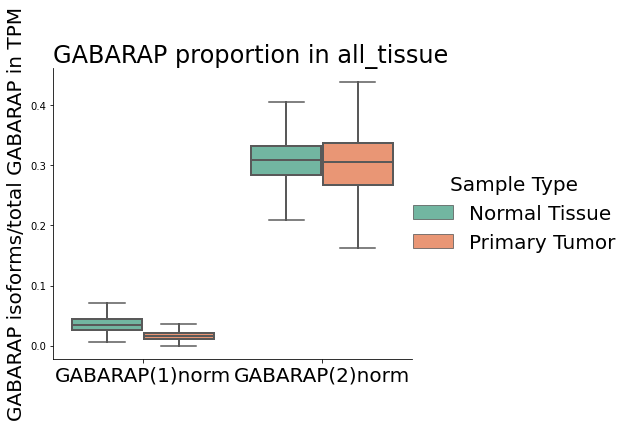

In [30]:
# NORMALiZED Distribution: Data preparation + graph

data = [[df_Norm_Prim, 'all_tissue']]


for df in data:
   
  shape = df[0].shape
  shape = shape[0]
  print(shape)

  #select the sample type column
  sample_type = {'sample_type':[df[0].iloc[:,1][i]
      for i in range(0, shape)]}

  #convert to df, and copy it 3 times
  sample_typedf = pandas.DataFrame(sample_type)
  sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf])
  sample_typedf.reset_index(drop=True, inplace=True)

  # Y for expression value 
  y = {'y':[df[0].iloc[:,j][i]
      for j in range(18,20)
        for i in range(0, shape)]}

  #create df with Y 
  data_distrib = pandas.DataFrame(y)

  # X for iso1/GABARAP and iso2/GABARAP
  data_distrib['x'] = ''
  data_distrib['x'][: shape] = 'GABARAP(1)norm'
  data_distrib['x'][shape:] = 'GABARAP(2)norm'


  # Will be used for Hue
  data_distrib['Sample Type'] = sample_typedf['sample_type']

  #graph
  seaborn.catplot(x="x", y="y", hue="Sample Type", aspect= 1.2, kind="box", palette = 'Set2', data = data_distrib, 
                  boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)
  
  plt.ylabel('GABARAP isoforms/total GABARAP in TPM')
  plt.xlabel('')
  plt.title('GABARAP proportion in '+ df[1], x=0.55)


In [31]:
#NORMALIZED Distribution: Stats for all 

all_dfs = [[df_GABARAP_Normal, 'all normal tissue', df_GABARAP_Primary, 'all primary tumors']]

isoforms = ['GABARAP(1)norm', 'GABARAP(2)norm']
print('NORMALIZED')

for df in all_dfs:
  for isoform in isoforms:

    n1 = "{:.3f}".format(numpy.median(df[0][isoform]))
    n2 = "{:.3f}".format(numpy.median(df[2][isoform]))

    # Mann-Whitney analysis 
    statistic, pvalue = scipy.stats.mannwhitneyu(df[0][isoform], df[2][isoform])
    Pvalue = "{:.3E}".format(pvalue)
    print("the pvalue between", df[1]+'('+n1+')', "and", df[3]+'('+n2+')', "for", isoform, 'is', Pvalue)
  print()


NORMALIZED
the pvalue between all normal tissue(0.034) and all primary tumors(0.016) for GABARAP(1)norm is 0.000E+00
the pvalue between all normal tissue(0.309) and all primary tumors(0.305) for GABARAP(2)norm is 2.153E-10



## D) Heatmaps

In [32]:
# df with only Normal and Primary 
HeatMap_df = pandas.concat([df_GABARAP_Normal, df_GABARAP_Primary], axis=0)

HeatMap_df_sampletype= HeatMap_df[['Sample_Type', 
                                    'GABARAP_1%',
                                    'GABARAP_2%',
                                    'GABARAP_3%']]

HeatMap_df_sampletype['GABARAP_3%'] = HeatMap_df_sampletype['GABARAP_3%'].abs()

<ipython-input-32-d3d7d37f7063>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HeatMap_df_sampletype['GABARAP_3%'] = HeatMap_df_sampletype['GABARAP_3%'].abs()


C:\Users\kja11\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


(array([0.5, 1.5]),
 [Text(0, 0.5, 'Normal Tissue'), Text(0, 1.5, 'Primary Tumor')])

findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


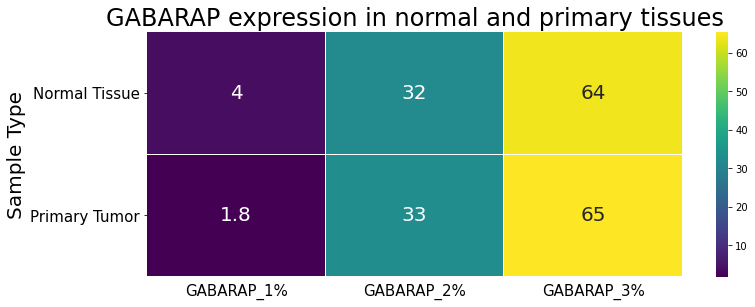

In [33]:
#Column rename
HeatMap_df_sampletype.rename(columns = {'Sample_Type' : 'Sample Type'}
                             , inplace = True)

#Groupby to have merge of all the primary site 
HeatMap_df_sampletype= HeatMap_df_sampletype.groupby('Sample Type').agg(numpy.mean)
HeatMap_df_sampletype

heatmap = seaborn.heatmap(HeatMap_df_sampletype, annot=True, cmap="viridis", linewidths=.10)
plt.title('GABARAP expression in normal and primary tissues')
plt.subplots_adjust(top=0.55)
plt.tick_params(axis='both', which='major', labelsize=15, labelbottom = True, bottom=False, top = False, labeltop=False)
plt.yticks(rotation=0) 

In [34]:
# df with only Normal 
HeatMap_df_sampletype= df_GABARAP_Normal[['Primary_Site',
                                    'GABARAP(total)',                               
                                    'GABARAP_1%',
                                    'GABARAP_2%',
                                    'GABARAP_3%']]

HeatMap_df_sampletype['GABARAP_1%'] = HeatMap_df_sampletype['GABARAP_1%'].abs()

<ipython-input-34-b2be967948bd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HeatMap_df_sampletype['GABARAP_1%'] = HeatMap_df_sampletype['GABARAP_1%'].abs()


In [35]:
HeatMap_df_sampletype.head()

,Primary_Site,GABARAP(total),GABARAP_1%,GABARAP_2%,GABARAP_3%
1,Blood,2469.493431,10.223127,28.775493,61.001379
2,Blood,2418.671971,4.113768,38.067128,57.819105
3,Blood,2320.145197,3.136710,38.326513,58.536777
4,Blood,2304.118777,5.380472,29.872427,64.747102
7,Blood,2164.771947,5.357890,39.744302,54.897808


In [36]:
#Column rename
HeatMap_df_sampletype.rename(columns = {'Primary_Site' : 'Primary Site', 
                                        'GABARAP(total)': 'tpm GABARAP',
                                        'GABARAP_1%' : "% GABARAP(1)",
                                        'GABARAP_2%' : "% GABARAP(2)",
                                        'GABARAP_3%' : "% GABARAP(3)"}, inplace = True)

#Groupby to have merge of all the primary site 
HeatMap_df_sampletype= HeatMap_df_sampletype.groupby('Primary Site').agg(numpy.mean)

#To not have 1E-06 I change it to zero
# HeatMap_df_sampletype['% GABARAP(3)']['Fallopian Tube'] = 0
print(HeatMap_df_sampletype)

                 tpm GABARAP  % GABARAP(1)  % GABARAP(2)  % GABARAP(3)
Primary Site                                                          
Adipose Tissue    611.745290      4.265457     33.489448     62.245095
Adrenal Gland     710.459729      3.215042     28.714365     68.070594
Bladder           601.868012      3.911816     35.536096     60.552088
Blood             818.760672      4.378653     36.720844     58.900503
Blood Vessel      775.732892      4.449757     34.702829     60.847414
Brain             445.082191      4.028923     29.928399     66.042678
Breast            636.240355      4.166772     33.494512     62.338716
Cervix Uteri      797.439539      4.264654     33.635539     62.099807
Colon             517.466702      4.143671     31.974919     63.881409
Esophagus         482.904874      3.902491     32.073687     64.023822
Fallopian Tube    653.575458      3.758611     33.277197     62.964192
Heart             322.145996      3.252816     31.030897     65.716287
Kidney

C:\Users\kja11\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


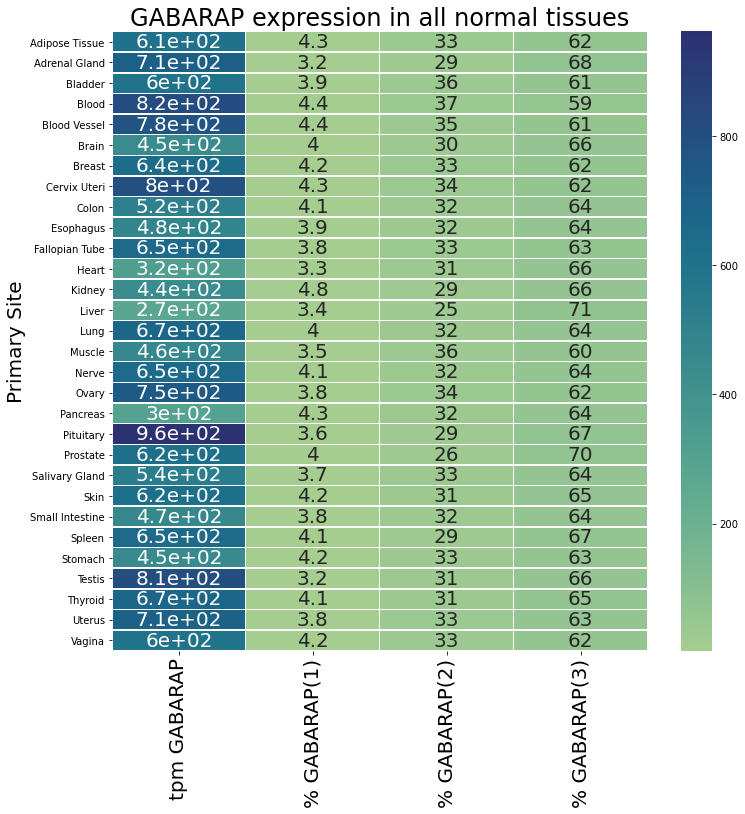

In [37]:
heatmap = seaborn.heatmap(HeatMap_df_sampletype, annot=True, cmap="crest", linewidths=.5)
plt.title('GABARAP expression in all normal tissues')
plt.subplots_adjust(top=1.2)

#IV] Expression correlation 

##1) between the two isoforms

primary
shape: (9185, 20)
shape after removing extrem dots: (9173, 20)

normal
shape: (7429, 20)
shape after removing extrem dots: (7402, 20)
The correlation between iso1 and iso2 in normal tissues is: 0.6068203100096994 0.0


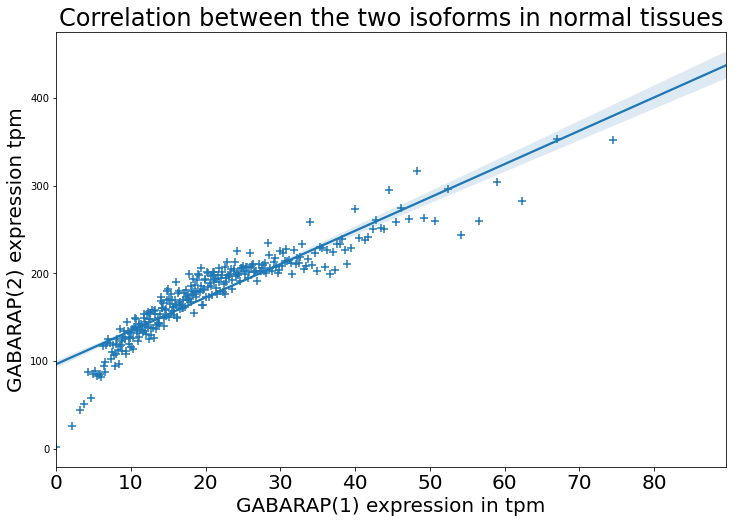


The correlation between iso1 and iso2 in primary tumors is: 0.6277291056654182 0.0


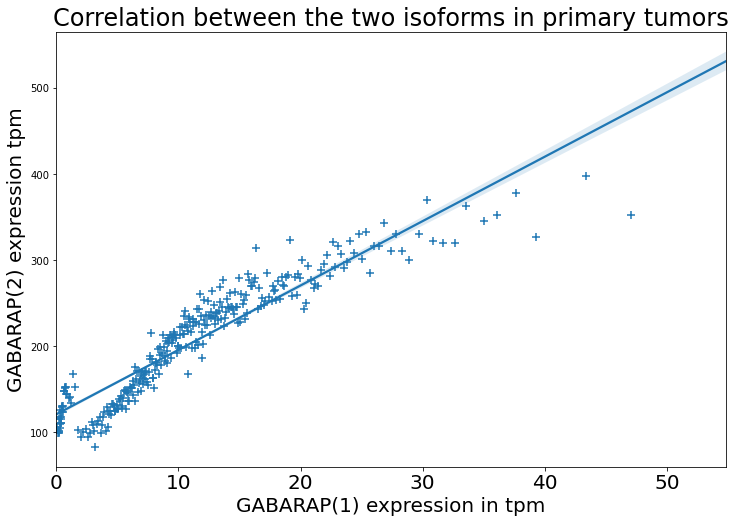

<Figure size 864x576 with 0 Axes>

In [38]:
#isoform correlation in all tissue 

#some values are very high and make my graph ugly... I remove them.
df_GABARAP_Primary2 = df_GABARAP_Primary[df_GABARAP_Primary['GABARAP(1)'] < 55 ]
print('primary')
print("shape:",df_GABARAP_Primary.shape)
print("shape after removing extrem dots:",df_GABARAP_Primary2.shape)
print()
df_GABARAP_Normal2 = df_GABARAP_Normal[df_GABARAP_Normal['GABARAP(1)'] < 90 ]
print('normal')
print("shape:",df_GABARAP_Normal.shape)
print("shape after removing extrem dots:",df_GABARAP_Normal2.shape)

tissues = [[df_GABARAP_Normal2, "normal tissues"], [df_GABARAP_Primary2, "primary tumors"]]

for tissue in tissues: 
  x = tissue[0]['GABARAP(1)'].to_list()
  y = tissue[0]['GABARAP(2)'].to_list()

  r_value, p_value = scipy.stats.pearsonr(x, y)
  print("The correlation between iso1 and iso2 in",tissue[1],"is:", r_value, p_value)

  seaborn.regplot(x=x,y=y, x_bins=300, x_ci = 0, marker="+")
  name = "Correlation between the two isoforms in "+  tissue[1]
  plt.title(name)
  plt.xlabel("GABARAP(1) expression in tpm")
  plt.ylabel('GABARAP(2) expression tpm')
  plt.show()
  plt.clf()
  print()


##2) between all protein coding

In [39]:
#to know the ensembl code for HK2
protein_coding_list.loc[protein_coding_list['hgnc_symbol'] == 'MFAP3']

,ensembl_gene_id,hgnc_symbol,entrezgene_id,transcript_biotype
19160,ENSG00000037749,MFAP3,4238.0,protein_coding


In [40]:
# pearson Correlation, main genes 

all_tissue_used = [[normal_protcoding_GABARAP_expr,'Normal Tissue'], [primary_protcoding_GABARAP_expr,'Primary Tumors']]

HK2 = 'ENSG00000159399'
YAP1 = 'ENSG00000137693'
AJUBA = 'ENSG00000129474'
YBX1 = 'ENSG00000065978'
TGFB1 = 'ENSG00000105329'
GABARAP_1 = 'GABARAP_1'
GABARAP_2 = 'GABARAP_2'
MTDH = 'ENSG00000147649'
MAPK1 = 'ENSG00000100030'
KPNA1 = 'ENSG00000114030'
TNPO1 = 'ENSG00000083312'

for tissue in all_tissue_used:
  genes_x = [[KPNA1,'KPNA1'], [MAPK1, 'MAPK1'], [TNPO1,'TNPO1'], [MTDH,'MTDH'], 
             [HK2, "HK2"], [YAP1, 'YAP1'], [AJUBA,'AJUBA'], [YBX1,'YBX1'], 
             [TGFB1,'TGFB1'], [GABARAP_1,'GABARAP_1'], [GABARAP_2,'GABARAP_2']]

  print(tissue[1])

  for gene in genes_x:
    x = tissue[0][gene[0]].to_list()
    y = tissue[0]['GABARAP'].to_list()
    y1 = tissue[0]['GABARAP_1'].to_list()
    y2 = tissue[0]['GABARAP_2'].to_list()  
  
    r_value, p_value = scipy.stats.pearsonr(x, y)
    print('  correlation between GABARAP and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
    r_value, p_value = scipy.stats.pearsonr(x, y1)
    print('  correlation between GABARAP_1 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
    r_value, p_value = scipy.stats.pearsonr(x, y2)
    print('  correlation between GABARAP_2 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
    print()

Normal Tissue
  correlation between GABARAP and KPNA1 is: r_value = 0.77 for a p_value of 0.00e+00
  correlation between GABARAP_1 and KPNA1 is: r_value = 0.65 for a p_value of 0.00e+00
  correlation between GABARAP_2 and KPNA1 is: r_value = 0.79 for a p_value of 0.00e+00

  correlation between GABARAP and MAPK1 is: r_value = 0.82 for a p_value of 0.00e+00
  correlation between GABARAP_1 and MAPK1 is: r_value = 0.67 for a p_value of 0.00e+00
  correlation between GABARAP_2 and MAPK1 is: r_value = 0.84 for a p_value of 0.00e+00

  correlation between GABARAP and TNPO1 is: r_value = 0.76 for a p_value of 0.00e+00
  correlation between GABARAP_1 and TNPO1 is: r_value = 0.67 for a p_value of 0.00e+00
  correlation between GABARAP_2 and TNPO1 is: r_value = 0.76 for a p_value of 0.00e+00

  correlation between GABARAP and MTDH is: r_value = 0.71 for a p_value of 0.00e+00
  correlation between GABARAP_1 and MTDH is: r_value = 0.62 for a p_value of 0.00e+00
  correlation between GABARAP_2 and 

In [41]:
%%time
# pearson Correlation, all genes WITHOUT cutoff
all_tissue_used = [[normal_protcoding_GABARAP_expr,'Normal_Tissues'], [primary_protcoding_GABARAP_expr,'Primary_Tumors']]

isoforms = ['GABARAP_1', 'GABARAP_2']

all_positiv_corr_pearson = []
all_negativ_corr_pearson = []

for tissue in all_tissue_used:
  print(tissue[1], tissue[0].shape)

  #create a new row with max() for each gene and transpose
  tissue[0].loc['max()'] = tissue[0].max()
  tissue[0] = tissue[0].T

  #select all row where max() > 2.3 (= 5 tpm)
  nb_before = tissue[0]['max()'].count()
  tissue[0] = tissue[0].drop(tissue[0].index[0:2])
  tissue[0] = tissue[0][tissue[0]['max()'] > 2.3]
  nb_after = tissue[0]['max()'].count()
  print("number of genes removed:", nb_before-nb_after)
  print('the minimum of TPM is', tissue[0]['max()'].min())
  
  #delete the column max() and tranpose back
  tissue[0] =  tissue[0].drop('max()', axis = 1) 
  tissue[0] = tissue[0].T
  print('nombre genes after removing < 4tpm', tissue[0].shape)

  for isoform in isoforms:

    genepos = []
    geneneg = []
    rvaluepos = []
    rvalueneg = []
    pvaluepos = []
    pvalueneg = []

    print(isoform)
    x = tissue[0][isoform].to_list()
    genes = tissue[0].columns[3:]

    for gene in genes:
      y = tissue[0][gene].to_list()
      r_value, p_value = scipy.stats.pearsonr(x, y)

      if r_value > 0:
        genepos.append(gene)
        rvaluepos.append(r_value)
        pvaluepos.append(p_value)
        
      elif r_value < 0:
        geneneg.append(gene)
        rvalueneg.append(r_value)
        pvalueneg.append(p_value)

    #create a dictionnary
    d = dict(ensembl_gene_id= genepos, r_value=rvaluepos,  p_value=pvaluepos)
    d2 = dict(ensembl_gene_id= geneneg, r_value=rvalueneg,  p_value=pvalueneg)

    #Convert to dataframe
    df_positiv_corr = pandas.DataFrame.from_dict(d, orient='index')
    df_negativ_corr = pandas.DataFrame.from_dict(data=d2, orient='index')

    #Transpose to have a better table
    df_positiv_corr = df_positiv_corr.transpose()
    df_negativ_corr = df_negativ_corr.transpose()

    #name
    positiv_corr = 'pos_pearson_corr_'+tissue[1]+'_'+isoform
    negativ_corr = 'neg_pearson_corr_'+tissue[1]+'_'+isoform

    print(positiv_corr, df_positiv_corr.shape)
    print(negativ_corr, df_negativ_corr.shape)

    #scending orde, save to excel
    df_positiv_corr['info'] = tissue[1]+'_'+isoform
    df_positiv_corr = protein_coding_list.merge(df_positiv_corr)
    df_positiv_corr = df_positiv_corr.drop(['entrezgene_id', 'transcript_biotype'], axis = 1)
    df_positiv_corr = df_positiv_corr.sort_values(['r_value'], ascending = False)
    df_positiv_corr.to_excel(positiv_corr+'.xlsx', index=False)

    df_negativ_corr['info'] = tissue[1]+'_'+isoform
    df_negativ_corr = protein_coding_list.merge(df_negativ_corr)
    df_negativ_corr = df_negativ_corr.drop(['entrezgene_id', 'transcript_biotype'], axis = 1)
    df_negativ_corr = df_negativ_corr.sort_values(['r_value'], ascending = False)
    df_negativ_corr.to_excel(negativ_corr+'.xlsx', index=False)

    all_positiv_corr_pearson.append(df_positiv_corr)
    all_negativ_corr_pearson.append(df_negativ_corr)
  print()

Normal_Tissues (7429, 19541)
number of genes removed: 966
the minimum of TPM is 2.3019
nombre genes after removing < 4tpm (7429, 18574)
GABARAP_1
pos_pearson_corr_Normal_Tissues_GABARAP_1 (17625, 3)
neg_pearson_corr_Normal_Tissues_GABARAP_1 (946, 3)
GABARAP_2
pos_pearson_corr_Normal_Tissues_GABARAP_2 (17726, 3)
neg_pearson_corr_Normal_Tissues_GABARAP_2 (845, 3)

Primary_Tumors (9185, 19387)
number of genes removed: 841
the minimum of TPM is 2.3048
nombre genes after removing < 4tpm (9185, 18546)
GABARAP_1
pos_pearson_corr_Primary_Tumors_GABARAP_1 (11861, 3)
neg_pearson_corr_Primary_Tumors_GABARAP_1 (6682, 3)
GABARAP_2
pos_pearson_corr_Primary_Tumors_GABARAP_2 (14348, 3)
neg_pearson_corr_Primary_Tumors_GABARAP_2 (4195, 3)

Wall time: 5min 40s


In [42]:
# #Graphic representation, two graphs in one

# all_tissue_used = [[normal_protcoding_GABARAP_expr,'Normal Tissue', 'blue'], 
#                    [primary_protcoding_GABARAP_expr,'Primary Tumors', 'chocolate']]

# HK2 = 'ENSG00000159399'
# YAP1 = 'ENSG00000137693'
# AJUBA = 'ENSG00000129474'
# YBX1 = 'ENSG00000065978'
# TGFB1 = 'ENSG00000105329'
# MAPK1 = 'ENSG00000100030'
# MTDH = 'ENSG00000147649'
# KPNA1 = 'ENSG00000114030'
# TNPO1 = 'ENSG00000083312'
# GABARAP = 'GABARAP'

 
# genes = [[GABARAP,'GABARAP'], [GABARAP_1,'GABARAP_1'], [MAPK1,'MAPK1'], [MTDH,'MTDH'], [KPNA1,'KPNA1'], 
#          [TNPO1,'TNPO1'], [HK2,'HK2'], [YAP1,'YAP1'], [AJUBA,'AJUBA'], [YBX1,'YBX1'], [TGFB1,'TGFB1']]

# for gene in genes:
#   for df in all_tissue_used:
    
#       fig, ax = plt.subplots(1,2, figsize=(18,8))
#       name = gene[1]+ " correlation with the two isoforms"
#       name2 = gene[1]+ " expression (log2 tpm)"

#       fig.suptitle(name, fontsize="x-large")

#       x = df[0][gene[0]].to_list()
#       y1 = df[0]['GABARAP_1'].to_list()
#       y2 = df[0]['GABARAP_2'].to_list()


#       fig = seaborn.regplot(x=x,y=y1, ax=ax[0], x_bins=500, x_ci = 0, marker="+", label = df[1], color = df[2])
#       fig.set_title("GABARAP(1)")
#       fig.set_xlabel(name2)
#       fig.set_ylabel('GABARAP(1) expression (log2 tpm)')

#       fig = seaborn.regplot(x=x,y=y2, ax=ax[1], x_bins=500, x_ci = 0, marker="+", label = df[1], color = df[2])
#       fig.set_title("GABARAP(2)")
#       fig.set_xlabel(name2)
#       fig.set_ylabel('GABARAP(2) expression (log2 tpm)')
#       plt.legend()
#       plt.show()
#       plt.clf()

#       print(df[1])
#       r_value, p_value = scipy.stats.pearsonr(x, y1)
#       print('  correlation between GABARAP_1 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
#       r_value, p_value = scipy.stats.pearsonr(x, y2)
#       print('  correlation between GABARAP_2 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
#       print()

#V] Distribution of all rvalue to select cutoff

shape positiv (946, 5)
shape negativ (17625, 5)
shape after merge (18571, 5)
shape positiv (845, 5)
shape negativ (17726, 5)
shape after merge (18571, 5)
shape positiv (6741, 5)
shape negativ (11933, 5)
shape after merge (18674, 5)
shape positiv (4237, 5)
shape negativ (14437, 5)
shape after merge (18674, 5)
shape normal (18571, 5)
shape primary (18571, 5)
shape after merge (37142, 5)
shape normal (18674, 5)
shape primary (18674, 5)
shape after merge (37348, 5)


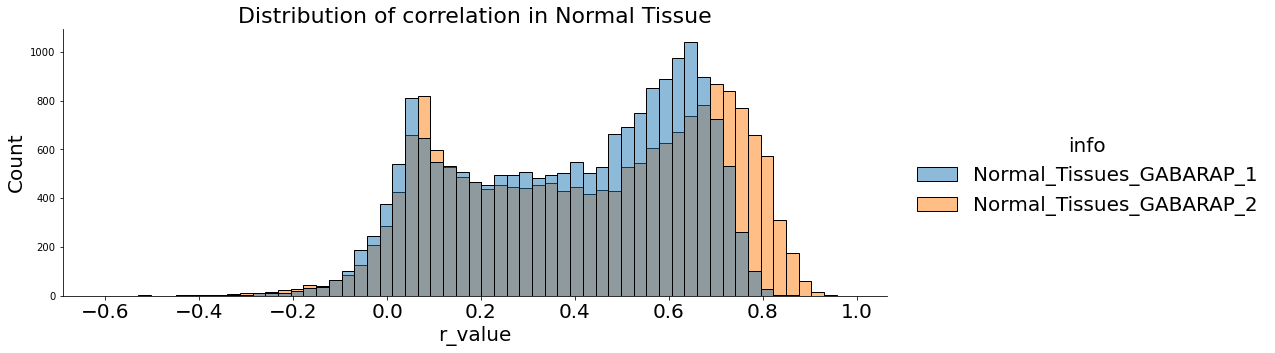

<Figure size 864x576 with 0 Axes>

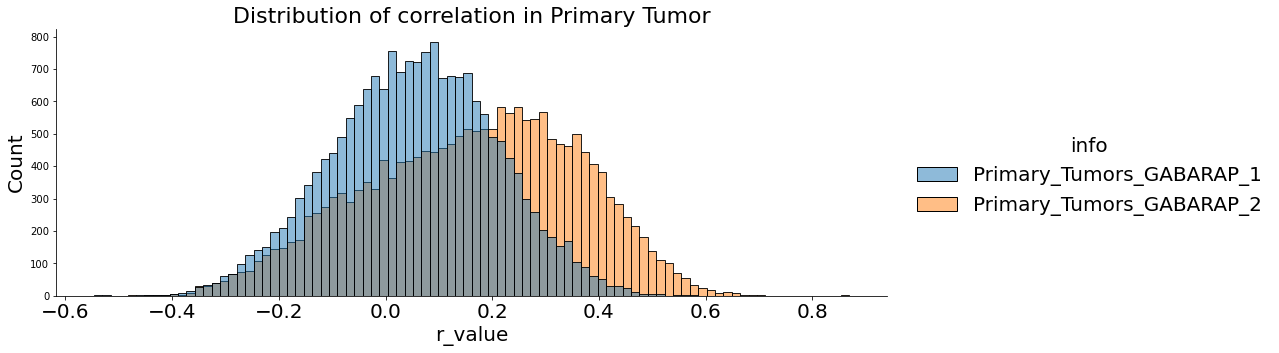


Wall time: 1.78 s


<Figure size 864x576 with 0 Axes>

In [55]:
%%time
#Merge Negative and Positive data
data =  [
         [all_negativ_corr_pearson[0], all_positiv_corr_pearson[0], 'Normal Tissue, GABARAP(1)'], 
         [all_negativ_corr_pearson[1], all_positiv_corr_pearson[1], 'Normal Tissue, GABARAP(2)'],
         [all_negativ_corr_pearson[2], all_positiv_corr_pearson[2], 'Primary Tumor, GABARAP(1)'], 
         [all_negativ_corr_pearson[3], all_positiv_corr_pearson[3], 'Primary Tumor, GABARAP(2)']
         ]

all_corr_negpos_merged = []
for dfs in data:
  print('shape positiv', dfs[0].shape)
  print('shape negativ', dfs[1].shape)

  df_merged = pandas.concat([dfs[0], dfs[1]], axis=0)
  df_merged = df_merged.reset_index(drop = True)
  print('shape after merge', df_merged.shape)
  all_corr_negpos_merged.append(df_merged)

#Merge GABARAP(1) and GABARAP(2)
data = [
        [all_corr_negpos_merged[0], all_corr_negpos_merged[1], 'Normal Tissue'],
        [all_corr_negpos_merged[2], all_corr_negpos_merged[3], 'Primary Tumor']
        ]

all_corr_isoforms_merged = []
for dfs in data:
  print('shape normal', dfs[0].shape)
  print('shape primary', dfs[1].shape)

  df_merged = pandas.concat([dfs[0], dfs[1]], axis=0)
  df_merged = df_merged.reset_index(drop = True)
  print('shape after merge', df_merged.shape)
  all_corr_isoforms_merged.append(df_merged)

#Distribution of correlation
data = [
        [all_corr_isoforms_merged[0], 'Normal Tissue'],
        [all_corr_isoforms_merged[1], 'Primary Tumor']
        ]

for dfs in data:
  seaborn.displot(dfs[0], x="r_value", hue='info', aspect = 2.6)
  label_title = 'Distribution of correlation in ' + dfs[1]
  plt.title(label_title, fontsize = 22)
  plt.show()
  plt.clf()
  print()

In [56]:
# have to select the 1% in extremities to have only the interesting one.
print((len(all_corr_negpos_merged)), '= norm iso1, norm iso2, prim iso1, prim iso2')

4 = norm iso1, norm iso2, prim iso1, prim iso2


In [57]:
all_corr_negpos_extremities = []

for df in all_corr_negpos_merged:
  df = df.sort_values(['r_value'], ascending = False)
  df = df.reset_index(drop = True)
  
  lenght = len(df)
  only_1_perc = int(lenght*0.010)
  just_head = only_1_perc
  just_tail = lenght - only_1_perc

  df_head = df.iloc[0:just_head,:]
  df_tail = df.iloc[just_tail:,:]
  df_extremeties = pandas.concat([df_head, df_tail], axis=0)

  inform = df['info'][1]
  extremities_name = 'corr_1%extremities'+ '_pearson_' +inform
  df_extremeties.to_excel(extremities_name+'.xlsx', index=False)

  all_corr_negpos_extremities.append(df_extremeties)

#VI] Venn diagrams

In [58]:
len(all_corr_negpos_extremities)

4

In [59]:
all_corr_negpos_extremities[0]

,ensembl_gene_id,hgnc_symbol,r_value,p_value,info
0,ENSG00000170296,GABARAP,0.874045,0,Normal_Tissues_GABARAP_1
1,ENSG00000219200,RNASEK,0.849602,0,Normal_Tissues_GABARAP_1
2,ENSG00000163041,H3-3A,0.830165,0,Normal_Tissues_GABARAP_1
3,ENSG00000022277,RTF2,0.829565,0,Normal_Tissues_GABARAP_1
4,ENSG00000130724,CHMP2A,0.817956,0,Normal_Tissues_GABARAP_1
...,...,...,...,...,...
18566,ENSG00000176742,OR51V1,-0.432504,0,Normal_Tissues_GABARAP_1
18567,ENSG00000183389,OR56A4,-0.442527,0,Normal_Tissues_GABARAP_1
18568,ENSG00000254834,OR5M10,-0.446004,0,Normal_Tissues_GABARAP_1
18569,ENSG00000121377,TAS2R7,-0.465302,0,Normal_Tissues_GABARAP_1


In [60]:
#separate pos and neg correlation
all_corr_positiv_extremities = []
all_corr_negativ_extremities = []

for df in all_corr_negpos_extremities:
    data_pos = df[df['r_value']>0]
    data_neg = df[df['r_value']<0]
    all_corr_positiv_extremities.append(data_pos)
    all_corr_negativ_extremities.append(data_neg)
len(all_corr_positiv_extremities)

4

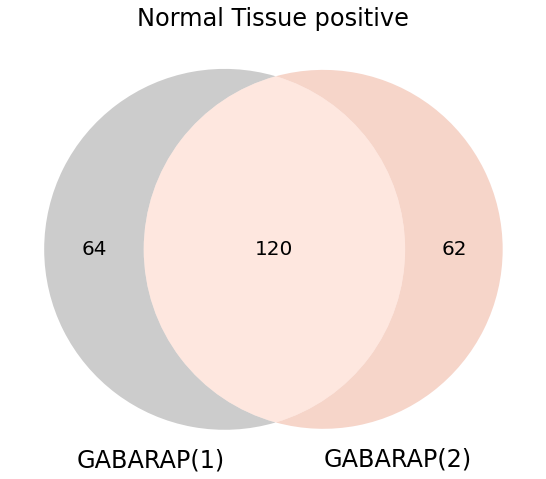

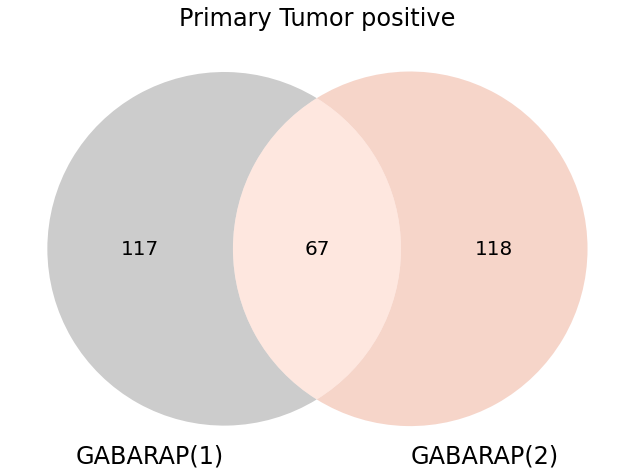

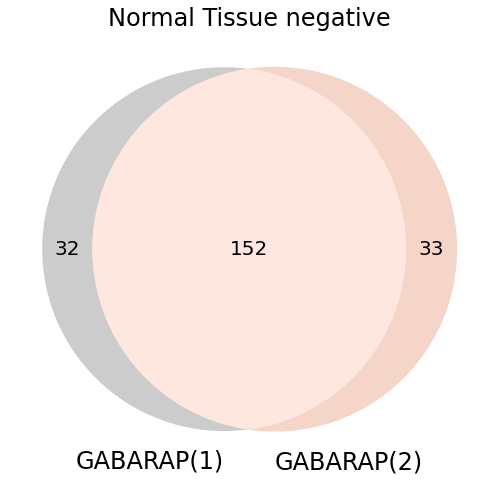

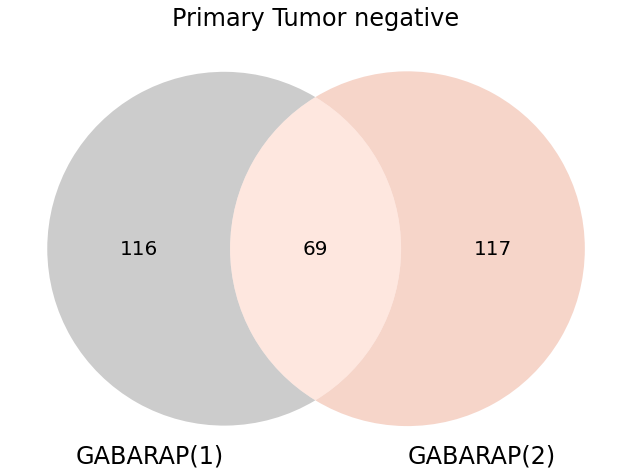

<Figure size 864x576 with 0 Axes>

In [69]:
#VENN DIAGRAMS FOR the 1% of the genes
data_pos =  [
         [all_corr_positiv_extremities[0], all_corr_positiv_extremities[1], 'Normal Tissue', 'positive'], 
         [all_corr_positiv_extremities[2], all_corr_positiv_extremities[3], 'Primary Tumor', 'positive']
         ]

data_neg =  [
         [all_corr_negativ_extremities[0], all_corr_negativ_extremities[1], 'Normal Tissue', 'negative'], 
         [all_corr_negativ_extremities[2], all_corr_negativ_extremities[3], 'Primary Tumor', 'negative']
         ]

data = data_pos + data_neg

for dfs in data:
    set1 = set(dfs[0]['hgnc_symbol'])
    set2 = set(dfs[1]['hgnc_symbol'])
    subset = (set1, set2)

    #save results in list
    with_only1 = list(set2.symmetric_difference(set1) & set1)
    with_only2 = list(set2.symmetric_difference(set1) & set2)
    intersection = set1.intersection(set2)

    #create a dictionnary
    d = dict(Only_GABARAP_1 = with_only1, Only_GABARAP_2 = with_only2, Intersection= intersection)

    #Convert to dataframe
    df_only_and_intersection = pandas.DataFrame.from_dict(d, orient='index')
    name_file = 'only_and_intersection_pearson_isos'+dfs[2]+dfs[3]

    #Transpose to have a better table and save
    df_only_and_intersection = df_only_and_intersection.transpose()
    df_only_and_intersection['info'] = dfs[2]+dfs[3]
    df_only_and_intersection.to_excel(name_file+'.xlsx', index=False)

    #Venn Diagram
    venn2(subset, set_labels=('GABARAP(1)', 'GABARAP(2)'), set_colors=('grey', 'darksalmon'))
    label_title = dfs[2] + ' ' + dfs[3]
    plt.title(label_title)
    plt.show()
    plt.clf()
    print()



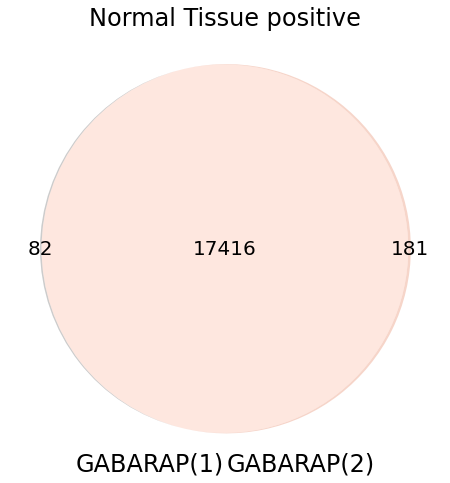

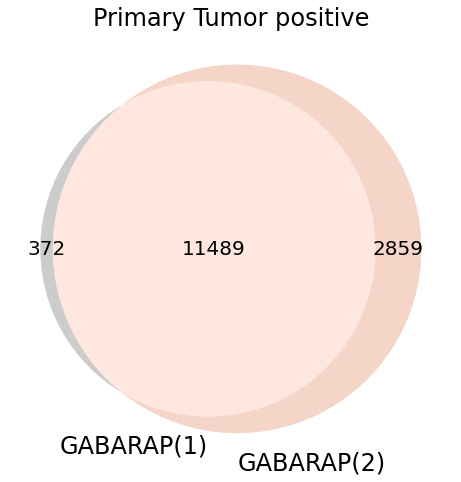

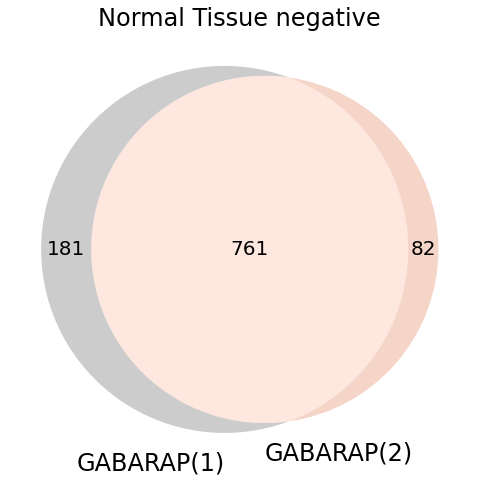

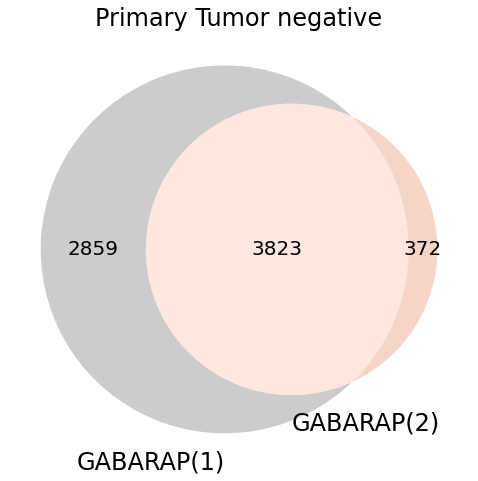

<Figure size 864x576 with 0 Axes>

In [62]:
#VENN DIAGRAMS FOR 100% of the genes

data_pos =  [
         [all_positiv_corr_pearson[0], all_positiv_corr_pearson[1], 'Normal Tissue', 'positive'], 
         [all_positiv_corr_pearson[2], all_positiv_corr_pearson[3], 'Primary Tumor', 'positive']
         ]

data_neg =  [
         [all_negativ_corr_pearson[0], all_negativ_corr_pearson[1], 'Normal Tissue', 'negative'], 
         [all_negativ_corr_pearson[2], all_negativ_corr_pearson[3], 'Primary Tumor', 'negative']
         ]

data = data_pos + data_neg

list_only1 = []
list_only2 = []

for dfs in data:
  set1 = set(dfs[0]['ensembl_gene_id'])
  set2 = set(dfs[1]['ensembl_gene_id'])
  subset = (set1, set2)

  #just to save some results in list
  with_only1 = set2.symmetric_difference(set1) & set1
  list_only1.append(with_only1)

  with_only2 = set2.symmetric_difference(set1) & set2
  list_only2.append(with_only2)

  #Venn Diagram
  venn2(subset, set_labels=('GABARAP(1)', 'GABARAP(2)'), set_colors=('grey', 'darksalmon'))
  label_title = dfs[2] + ' ' + dfs[3]
  plt.title(label_title)
  plt.show()
  plt.clf()
  print()



In [63]:
print((len(list_only2)), '= norm_pos_iso2, norm_neg_iso2, prim_pos_iso2, prim_neg_iso2, ')

4 = norm_pos_iso2, norm_neg_iso2, prim_pos_iso2, prim_neg_iso2, 


In [64]:
#To have the corr of only iso 2

set_to_dict = dict.fromkeys(list_only2[0],0)
df_only = pandas.DataFrame.from_dict(set_to_dict, orient='index')
df_only = df_only.reset_index()
df_only.rename(columns = {'index' : 'ensembl_gene_id'}, inplace = True)
dfmerged = df_only.merge(all_positiv_corr_pearson[1])
dfmerged['Type'] = 'Normal Tissue'
dfmerged['Isoform'] = 'GABARAP(2) only'
dfmerged.drop(dfmerged.columns[[1, 5]], axis = 1, inplace = True)

#remove duplicates in genes
print(dfmerged.shape)
print('number of duplicated genes:', dfmerged.duplicated('ensembl_gene_id').sum())
dfmerged.drop_duplicates("ensembl_gene_id", inplace = True)
print(dfmerged.shape)

dfmerged = dfmerged.sort_values(['r_value'], ascending = False)
only_iso2_normal_pos = dfmerged.copy()
only_iso2_normal_pos

(183, 6)
number of duplicated genes: 2
(181, 6)


,ensembl_gene_id,hgnc_symbol,r_value,p_value,Type,Isoform
141,ENSG00000255639,NaN,0.253354,3.71827e-109,Normal Tissue,GABARAP(2) only
117,ENSG00000254692,NaN,0.18,3.9e-55,Normal Tissue,GABARAP(2) only
88,ENSG00000236782,ZNF593OS,0.137558,1.03696e-32,Normal Tissue,GABARAP(2) only
39,ENSG00000257767,NaN,0.129521,3.68499e-29,Normal Tissue,GABARAP(2) only
138,ENSG00000256500,NaN,0.103466,3.87779e-19,Normal Tissue,GABARAP(2) only
...,...,...,...,...,...,...
169,ENSG00000106331,PAX4,0.00138641,0.904897,Normal Tissue,GABARAP(2) only
86,ENSG00000187559,FOXD4L3,0.00117549,0.919312,Normal Tissue,GABARAP(2) only
52,ENSG00000127325,BEST3,0.000731874,0.94971,Normal Tissue,GABARAP(2) only
24,ENSG00000166984,TCP10L2,0.000340412,0.976597,Normal Tissue,GABARAP(2) only


Text(0.5, 1.0, 'Distribution of pos correlation in iso2 only, normal')

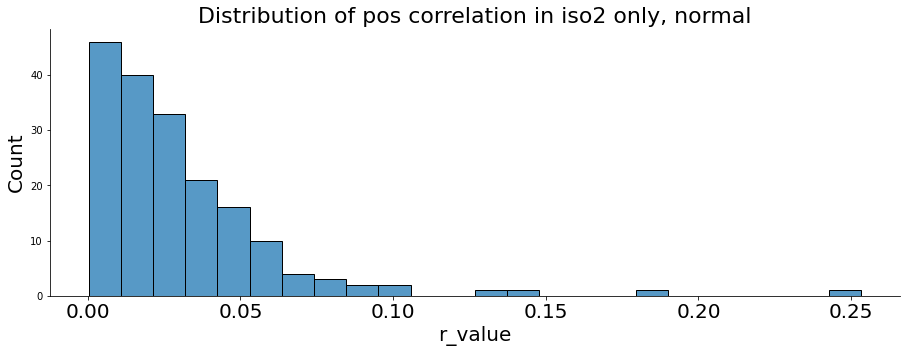

In [65]:
seaborn.displot(only_iso2_normal_pos, x="r_value", aspect = 2.6)
label_title = 'Distribution of pos correlation in iso2 only, normal'
plt.title(label_title, fontsize = 22)

In [66]:
#save to csv
only_iso2_normal_pos.to_excel('Correlated_only_iso2_normal_pos.xlsx', index=False)